# 이진 분류, 다중 분류
---
|구분|마지막 출력층|Loss|y_label 값|
|:--:|:--:|:--:|:--:|
|1|Dense(1, activation="sigmoid")|binary_crossentropy|이진 분류|
|2|Dense(2 이상, activation="softmax")|categorical_crossentropy|다중 분류, One_hot_Encoding 되어 있음|
|3|Dense(2 이상, activation="softmax")|sparse_categorical_crossentropy	|다중 분류, One_hot_Encoding 되지 않음|

# 이진 분류
---
1. 이진 분류: `binary_crossentropy`
2. 이진 분류 ➡️ 다중 분류+원핫인코딩o: `categorical_crossentropy`
3. 이진 분류 ➡️ 다중 분류+원핫인코딩x: `sparse_categorical_crossentropy`

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비
- 데이터셋: diabetes.csv(당뇨병 데이터)

In [1]:
# !wget https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.shape

(768, 9)

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 결측치
diabetes.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

- 데이터 분리: train, test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


- 정규화: StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# # 방법-1
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)

# 방법-2
X_train = scaler.fit_transform(X_train)
type(X_train)

numpy.ndarray

In [ ]:
X_train[:5] # numpy.ndarray

array([[-0.55713856, -0.47283463, -0.67075629,  0.42224206,  0.72137637,
        -0.37293055, -0.11247739, -0.97288519],
       [ 0.02761883,  1.15959012,  0.45604087, -1.29258619, -0.69789693,
         0.12286087,  1.07627438, -0.21396882],
       [-0.84951726,  2.35251591,  0.35360476,  0.99385148,  1.44391551,
         0.58051448,  1.30330389, -0.3826169 ],
       [-0.84951726, -0.69258412,  0.14873255,  0.61277854, -0.54306712,
         0.84747909, -0.15662202, -1.05720923],
       [-0.84951726, -0.47283463,  0.04629645,  0.48575422,  0.46332668,
         0.28812467, -1.0079827 , -0.97288519]])

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
y_train = y_train.values
y_test = y_test.values

### Case 1. 이진 분류
- y = 0 또는 1
- binary_crossentropy

In [ ]:
def build_model_1():
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(8,)), 
        layers.Dense(8, activation='relu'), 
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

    return model

In [ ]:
model = build_model_1()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


- 학습

In [ ]:
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/30
16/16 [==============================] - 10s 41ms/step - loss: 0.7184 - acc: 0.4888 - val_loss: 0.7196 - val_acc: 0.5122
Epoch 2/30
16/16 [==============================] - 0s 12ms/step - loss: 0.6954 - acc: 0.5377 - val_loss: 0.6962 - val_acc: 0.5691
Epoch 3/30
16/16 [==============================] - 0s 23ms/step - loss: 0.6773 - acc: 0.6273 - val_loss: 0.6814 - val_acc: 0.5772
Epoch 4/30
16/16 [==============================] - 0s 10ms/step - loss: 0.6622 - acc: 0.6823 - val_loss: 0.6677 - val_acc: 0.6179
Epoch 5/30
16/16 [==============================] - 0s 17ms/step - loss: 0.6487 - acc: 0.6945 - val_loss: 0.6552 - val_acc: 0.6341
Epoch 6/30
16/16 [==============================] - 0s 10ms/step - loss: 0.6354 - acc: 0.7128 - val_loss: 0.6418 - val_acc: 0.6829
Epoch 7/30
16/16 [==============================] - 0s 13ms/step - loss: 0.6227 - acc: 0.7271 - val_loss: 0.6273 - val_acc: 0.6911
Epoch 8/30
16/16 [==============================] - 0s 16ms/step - loss: 0.6086 - 

- 평가

In [ ]:
# 학습 데이터에 대한 성능
model.evaluate(X_train, y_train)

20/20 [==============================] - 0s 9ms/step - loss: 0.4495 - acc: 0.7932


[0.44953009486198425, 0.7931596040725708]

In [ ]:
# 테스트 데이터에 대한 성능
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 6ms/step - loss: 0.4945 - acc: 0.7532


[0.49448108673095703, 0.7532467246055603]

- 예측

In [ ]:
# 예측
y_pred = model.predict(X_test)
y_pred[:5]

5/5 [==============================] - 0s 4ms/step


array([[0.13956675],
       [0.84414923],
       [0.2795357 ],
       [0.475444  ],
       [0.20954044]], dtype=float32)

In [ ]:
y_pred = y_pred.reshape(-1)
y_pred[:5]

array([0.13956675, 0.84414923, 0.2795357 , 0.475444  , 0.20954044],
      dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5).astype('int')
y_pred[:5]

array([0, 1, 0, 0, 0])

### Case 2. 이진 분류 ➡️ 다중 분류+원핫인코딩o
- y = [1, 0] 또는 [0, 1]
- categorical_crossentropy

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_train_oh[:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
def build_model_2():
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(8,)), 
        layers.Dense(8, activation='relu'), 
        layers.Dense(2, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [ ]:
model = build_model_2()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 298
Trainable params: 298
Non-trainable params: 0
_________________________________________________________________


- 학습

In [ ]:
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train, y_train_oh, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/30
16/16 [==============================] - 3s 16ms/step - loss: 0.7309 - acc: 0.3809 - val_loss: 0.7275 - val_acc: 0.4309
Epoch 2/30
16/16 [==============================] - 0s 6ms/step - loss: 0.6984 - acc: 0.4969 - val_loss: 0.6955 - val_acc: 0.5528
Epoch 3/30
16/16 [==============================] - 0s 6ms/step - loss: 0.6720 - acc: 0.6293 - val_loss: 0.6684 - val_acc: 0.6667
Epoch 4/30
16/16 [==============================] - 0s 7ms/step - loss: 0.6514 - acc: 0.6945 - val_loss: 0.6448 - val_acc: 0.7154
Epoch 5/30
16/16 [==============================] - 0s 6ms/step - loss: 0.6323 - acc: 0.7067 - val_loss: 0.6229 - val_acc: 0.7236
Epoch 6/30
16/16 [==============================] - 0s 7ms/step - loss: 0.6164 - acc: 0.7108 - val_loss: 0.6047 - val_acc: 0.7317
Epoch 7/30
16/16 [==============================] - 0s 6ms/step - loss: 0.6009 - acc: 0.7251 - val_loss: 0.5824 - val_acc: 0.7561
Epoch 8/30
16/16 [==============================] - 0s 6ms/step - loss: 0.5843 - acc: 0.7

- 평가

In [ ]:
# 학습 데이터에 대한 성능
model.evaluate(X_train, y_train_oh)

20/20 [==============================] - 0s 3ms/step - loss: 0.4470 - acc: 0.7915


[0.4470083713531494, 0.791530966758728]

In [ ]:
y_test_oh = to_categorical(y_test)
y_test_oh[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
# 테스트 데이터에 대한 성능
model.evaluate(X_test, y_test_oh)

5/5 [==============================] - 0s 4ms/step - loss: 0.5106 - acc: 0.7532


[0.5105737447738647, 0.7532467246055603]

- 예측

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

5/5 [==============================] - 0s 3ms/step


array([[0.8989716 , 0.10102843],
       [0.31042707, 0.68957293],
       [0.4482936 , 0.5517064 ],
       [0.73005176, 0.26994824],
       [0.72719085, 0.27280918]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([0, 1, 1, 0, 0])

### Case 3. 이진 분류 ➡️ 다중 분류+원핫인코딩x
- sparse_categorical_crossentropy	

In [ ]:
def build_model_3():
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(8,)), 
        layers.Dense(8, activation='relu'), 
        layers.Dense(2, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

    return model

In [ ]:
model = build_model_3()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                144       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 2)                 18        
                                                                 
Total params: 298
Trainable params: 298
Non-trainable params: 0
_________________________________________________________________


- 학습

In [ ]:
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/30
16/16 [==============================] - 1s 17ms/step - loss: 0.7321 - acc: 0.3870 - val_loss: 0.7298 - val_acc: 0.4065
Epoch 2/30
16/16 [==============================] - 0s 7ms/step - loss: 0.6900 - acc: 0.5071 - val_loss: 0.6913 - val_acc: 0.6260
Epoch 3/30
16/16 [==============================] - 0s 6ms/step - loss: 0.6627 - acc: 0.6680 - val_loss: 0.6646 - val_acc: 0.6829
Epoch 4/30
16/16 [==============================] - 0s 7ms/step - loss: 0.6433 - acc: 0.7128 - val_loss: 0.6435 - val_acc: 0.7398
Epoch 5/30
16/16 [==============================] - 0s 5ms/step - loss: 0.6268 - acc: 0.7312 - val_loss: 0.6239 - val_acc: 0.7805
Epoch 6/30
16/16 [==============================] - 0s 6ms/step - loss: 0.6123 - acc: 0.7454 - val_loss: 0.6052 - val_acc: 0.7724
Epoch 7/30
16/16 [==============================] - 0s 6ms/step - loss: 0.5972 - acc: 0.7454 - val_loss: 0.5866 - val_acc: 0.7724
Epoch 8/30
16/16 [==============================] - 0s 5ms/step - loss: 0.5819 - acc: 0.7

- 평가

In [ ]:
# 학습 데이터에 대한 성능
model.evaluate(X_train, y_train)

20/20 [==============================] - 0s 4ms/step - loss: 0.4448 - acc: 0.7899


[0.44483819603919983, 0.7899022698402405]

In [ ]:
# 테스트 데이터에 대한 성능
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.4922 - acc: 0.7532


[0.4922064244747162, 0.7532467246055603]

- 예측

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

5/5 [==============================] - 0s 3ms/step


array([[0.9024809 , 0.09751908],
       [0.21440142, 0.7855986 ],
       [0.56191117, 0.4380888 ],
       [0.5302056 , 0.46979442],
       [0.7635967 , 0.23640324]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([0, 1, 0, 0, 0])

# 다중 분류
---
1. 다중 분류+원핫인코딩o: `categorical_crossentropy`
2. 다중 분류+원핫인코딩x: `sparse_categorical_crossentropy`

### 데이터 준비
- 데이터셋: MNIST(손 글씨 숫자 데이터)

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
type(X_train)

numpy.ndarray

- 시각화

In [ ]:
samples = np.random.randint(60000, size=9)
print(samples)

[12528 32369 18038 15078 16320 20389   527 44922 16960]


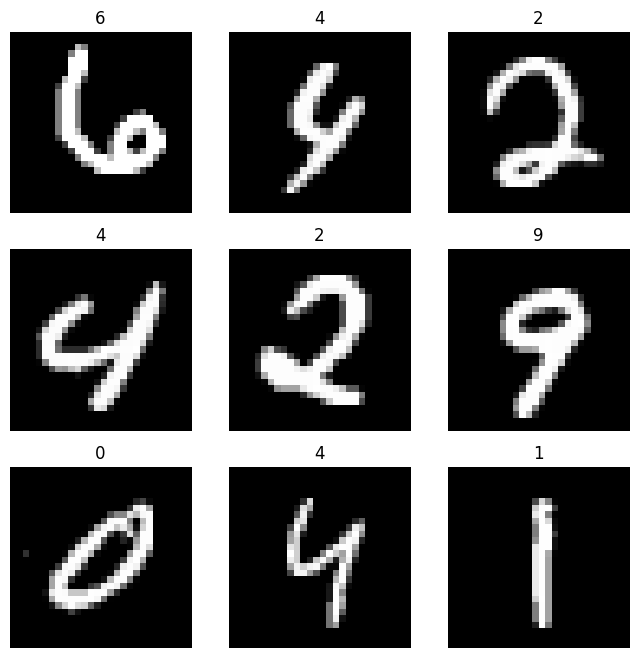

In [ ]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(y_train[idx])
plt.show()

- 데이터 분리: train, validation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2, 
                                                  stratify=y_train, 
                                                  random_state=1234)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(48000, 28, 28) (12000, 28, 28)
(48000,) (12000,)


- 정규화<br>
$x_{scaler}=\frac{x_{min}}{x_{max}-x_{min}}$

In [ ]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

- 다중 분류: 원-핫 인코딩

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

y_train_oh[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train_oh.shape

(48000, 10)

In [ ]:
X_train.shape

(48000, 28, 28)

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
X_train.shape

(48000, 28, 28, 1)

### Case 1. 다중 분류+원핫인코딩o
- categorical_crossentropy

In [ ]:
def build_model_4():
    model = keras.Sequential([
        layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)), 
        layers.MaxPool2D(2), 
        layers.Conv2D(64, 3, activation='relu'), 
        layers.MaxPool2D(2), 
        layers.Flatten(), 
        layers.Dense(256, activation='relu'), 
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [ ]:
model = build_model_4()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_9 (Dense)             (None, 256)              

- 학습

In [ ]:
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train, y_train_oh, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(X_val, y_val_oh), 
                    verbose=1)

Epoch 1/30
1500/1500 [==============================] - 18s 8ms/step - loss: 0.1330 - acc: 0.9597 - val_loss: 0.0568 - val_acc: 0.9832
Epoch 2/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0414 - acc: 0.9869 - val_loss: 0.0524 - val_acc: 0.9836
Epoch 3/30
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0278 - acc: 0.9906 - val_loss: 0.0408 - val_acc: 0.9888
Epoch 4/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0192 - acc: 0.9935 - val_loss: 0.0446 - val_acc: 0.9874
Epoch 5/30
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0145 - acc: 0.9953 - val_loss: 0.0403 - val_acc: 0.9893
Epoch 6/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0118 - acc: 0.9962 - val_loss: 0.0443 - val_acc: 0.9893
Epoch 7/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0086 - acc: 0.9971 - val_loss: 0.0515 - val_acc: 0.9889
Epoch 8/30
1500/1500 [==============================] - 7s 5

- 평가

In [ ]:
# 학습 데이터에 대한 성능
model.evaluate(X_train, y_train_oh)

1500/1500 [==============================] - 4s 2ms/step - loss: 0.0051 - acc: 0.9989


[0.005053423345088959, 0.9988541603088379]

In [ ]:
# 테스트 데이터에 대한 성능
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.0905 - acc: 0.9897


[0.09046325087547302, 0.9897000193595886]

- 예측

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[0.0000000e+00, 4.5618576e-24, 1.4418003e-26, 1.6095501e-25,
        6.0869878e-28, 3.4042241e-31, 0.0000000e+00, 1.0000000e+00,
        4.8437220e-28, 4.0402872e-24],
       [6.9752332e-26, 2.5087562e-25, 1.0000000e+00, 4.8624636e-33,
        1.3532403e-22, 7.6918582e-35, 9.4876424e-27, 8.8477738e-27,
        1.2602143e-29, 5.5964052e-33],
       [3.7988522e-20, 1.0000000e+00, 1.7956101e-14, 4.0483310e-21,
        4.9305733e-11, 1.5351660e-15, 7.7260279e-13, 3.4692685e-12,
        7.6936096e-15, 2.6310584e-19],
       [1.0000000e+00, 1.7337097e-28, 5.5089142e-30, 3.0999461e-32,
        3.2575241e-26, 6.5277147e-22, 5.6775142e-18, 5.7035401e-26,
        1.9545572e-27, 4.4738716e-20],
       [1.0811706e-31, 2.7136528e-21, 4.1010995e-22, 4.7093856e-36,
        1.0000000e+00, 1.0823437e-29, 2.6254816e-28, 1.2719795e-29,
        3.4996712e-25, 2.0983764e-25]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([7, 2, 1, 0, 4])

### Case 2. 다중 분류+원핫인코딩x
- sparse_categorical_crossentropy

In [ ]:
def build_model_5():
    model = keras.Sequential([
        layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)), 
        layers.MaxPool2D(2), 
        layers.Conv2D(64, 3, activation='relu'), 
        layers.MaxPool2D(2), 
        layers.Flatten(), 
        layers.Dense(256, activation='relu'), 
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

    return model

In [ ]:
model = build_model_5()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_11 (Dense)            (None, 256)              

- 학습

In [ ]:
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(X_val, y_val), 
                    verbose=1)

Epoch 1/30
1500/1500 [==============================] - 9s 4ms/step - loss: 0.1387 - acc: 0.9569 - val_loss: 0.0556 - val_acc: 0.9830
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0448 - acc: 0.9855 - val_loss: 0.0529 - val_acc: 0.9834
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0291 - acc: 0.9907 - val_loss: 0.0369 - val_acc: 0.9899
Epoch 4/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0210 - acc: 0.9931 - val_loss: 0.0525 - val_acc: 0.9852
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0153 - acc: 0.9950 - val_loss: 0.0417 - val_acc: 0.9896
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0117 - acc: 0.9961 - val_loss: 0.0531 - val_acc: 0.9875
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0104 - acc: 0.9966 - val_loss: 0.0451 - val_acc: 0.9887
Epoch 8/30
1500/1500 [==============================] - 7s 5ms

- 평가

In [ ]:
# 학습 데이터에 대한 성능
model.evaluate(X_train, y_train)

1500/1500 [==============================] - 4s 2ms/step - loss: 0.0015 - acc: 0.9995


[0.0014789917040616274, 0.9995208382606506]

In [ ]:
# 테스트 데이터에 대한 성능
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0717 - acc: 0.9896


[0.07174069434404373, 0.9896000027656555]

- 예측

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.6155659e-37, 5.2937723e-29, 8.9993824e-28, 1.6631819e-21,
        5.6850562e-33, 2.0879399e-33, 0.0000000e+00, 1.0000000e+00,
        1.6817286e-28, 7.3723293e-23],
       [2.6043571e-26, 2.5451617e-27, 1.0000000e+00, 1.8209589e-34,
        0.0000000e+00, 0.0000000e+00, 1.7130449e-31, 3.9965374e-32,
        3.0505226e-33, 0.0000000e+00],
       [3.1287971e-21, 1.0000000e+00, 1.1209089e-22, 1.2625548e-26,
        1.1459844e-09, 8.4520611e-16, 3.3814399e-19, 9.4538696e-18,
        2.3504124e-16, 1.2712319e-15],
       [1.0000000e+00, 2.8139748e-25, 1.2367517e-26, 8.0263843e-28,
        2.9645314e-31, 6.7996274e-27, 1.5456561e-21, 5.2877965e-22,
        2.5352524e-24, 3.6786364e-18],
       [1.5868458e-26, 2.3775420e-20, 3.4204232e-20, 3.0372686e-29,
        1.0000000e+00, 4.6360125e-24, 9.2322711e-24, 6.4732603e-22,
        1.2667587e-23, 1.6157091e-16]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([7, 2, 1, 0, 4])

### 데이터 준비
**tf.data.Dataset**
- train_ds, val_ds 예제

In [ ]:
# iterator
for i in [1, 2, 3, 4, 5]:
    print(i)

1
2
3
4
5


In [ ]:
data = [1, 2, 3, 4, 5]
my_iter = iter(data)
# type(my_iter)

i = my_iter.__next__()
print(i)

i = my_iter.__next__()
print(i)

i = my_iter.__next__()
print(i)

i = my_iter.__next__()
print(i)

i = my_iter.__next__()
print(i)

1
2
3
4
5


In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2, 
                                                  stratify=y_train, 
                                                  random_state=1234)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(48000, 28, 28) (12000, 28, 28)
(48000,) (12000,)


- 정규화

In [ ]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
type(train_ds)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [ ]:
train_ds = train_ds.shuffle(buffer_size=50000).batch(batch_size=32)
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

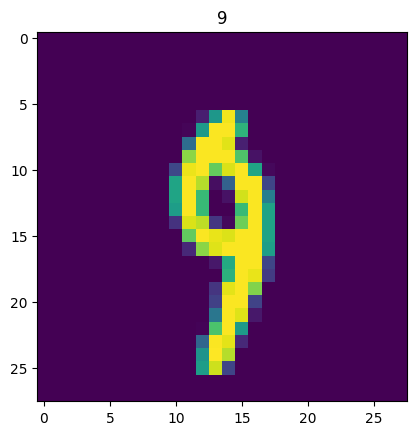

In [ ]:
my_iter = iter(train_ds)
x, y = my_iter.next()
# print(len(x), len(y))

plt.imshow(tf.reshape(x[0], [28, 28]))
plt.title(y[0].numpy())
plt.show()

In [ ]:
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_ds = val_ds.batch(batch_size=32)

In [ ]:
model = build_model_5()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_13 (Dense)            (None, 256)              

- 학습

In [ ]:
EPOCHS = 30

history = model.fit(train_ds, 
                    epochs=EPOCHS, 
                    validation_data=val_ds, 
                    verbose=1)

Epoch 1/30
1500/1500 [==============================] - 9s 4ms/step - loss: 0.1304 - acc: 0.9605 - val_loss: 0.0606 - val_acc: 0.9814
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0418 - acc: 0.9869 - val_loss: 0.0576 - val_acc: 0.9827
Epoch 3/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0268 - acc: 0.9917 - val_loss: 0.0383 - val_acc: 0.9892
Epoch 4/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0183 - acc: 0.9942 - val_loss: 0.0500 - val_acc: 0.9872
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0151 - acc: 0.9947 - val_loss: 0.0415 - val_acc: 0.9893
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0103 - acc: 0.9963 - val_loss: 0.0486 - val_acc: 0.9899
Epoch 7/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0089 - acc: 0.9970 - val_loss: 0.0512 - val_acc: 0.9878
Epoch 8/30
1500/1500 [==============================] - 7s 5ms

- 평가

In [ ]:
# 학습 데이터에 대한 성능
model.evaluate(train_ds)

1500/1500 [==============================] - 4s 3ms/step - loss: 0.0039 - acc: 0.9988


[0.003926296252757311, 0.9988124966621399]

- 예측

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[7.76194931e-28, 5.44979626e-25, 8.50739262e-27, 1.07214602e-26,
        4.14828383e-31, 4.37603407e-30, 2.05452756e-32, 1.00000000e+00,
        5.30363773e-21, 2.14920789e-21],
       [5.34991466e-33, 4.56607302e-23, 1.00000000e+00, 2.71094741e-32,
        0.00000000e+00, 0.00000000e+00, 2.65092714e-25, 7.72172826e-35,
        1.69147892e-32, 0.00000000e+00],
       [2.29600632e-26, 1.00000000e+00, 1.82179179e-20, 2.26335383e-32,
        1.89708179e-21, 1.07616540e-19, 9.84879840e-23, 3.68914411e-20,
        4.92256058e-25, 5.97390198e-28],
       [1.00000000e+00, 6.86755322e-29, 8.58531917e-25, 5.10425000e-30,
        7.08994951e-32, 2.14244430e-23, 5.32017528e-20, 1.28005398e-23,
        5.04240846e-26, 9.14990177e-19],
       [2.93908274e-24, 4.04261280e-14, 1.26081155e-20, 2.35278909e-24,
        1.00000000e+00, 5.05671149e-22, 1.52579504e-23, 1.39444871e-25,
        3.26777205e-23, 3.00316160e-17]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([7, 2, 1, 0, 4])

### Functional API로 만든 모델

In [ ]:
from tensorflow.keras import Model

In [ ]:
def build_model_6():
    inputs = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation='relu')(inputs)
    x = layers.MaxPool2D(2)(x)
    x = layers.Conv2D(64, 3, activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

    return model

In [ ]:
model = build_model_6()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0     

- 학습

In [ ]:
EPOCHS = 30

history = model.fit(train_ds, 
                    epochs=EPOCHS, 
                    validation_data=val_ds, 
                    verbose=1)

Epoch 1/30
1500/1500 [==============================] - 9s 5ms/step - loss: 0.1302 - acc: 0.9597 - val_loss: 0.0717 - val_acc: 0.9788
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0442 - acc: 0.9860 - val_loss: 0.0547 - val_acc: 0.9833
Epoch 3/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0290 - acc: 0.9910 - val_loss: 0.0449 - val_acc: 0.9858
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0211 - acc: 0.9928 - val_loss: 0.0381 - val_acc: 0.9902
Epoch 5/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0142 - acc: 0.9954 - val_loss: 0.0437 - val_acc: 0.9885
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0116 - acc: 0.9964 - val_loss: 0.0484 - val_acc: 0.9882
Epoch 7/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0110 - acc: 0.9962 - val_loss: 0.0472 - val_acc: 0.9875
Epoch 8/30
1500/1500 [==============================] - 7s 5ms

- 평가

In [ ]:
# 학습 데이터에 대한 성능
model.evaluate(train_ds)

1500/1500 [==============================] - 4s 2ms/step - loss: 7.1038e-04 - acc: 0.9997


[0.0007103828829713166, 0.999666690826416]

- 예측

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.4893164e-34, 5.0077892e-26, 1.5995271e-29, 2.6493339e-22,
        4.1320890e-34, 1.1405483e-35, 0.0000000e+00, 1.0000000e+00,
        5.7274787e-34, 1.0639269e-21],
       [3.2101381e-21, 2.3197742e-28, 1.0000000e+00, 3.3132029e-35,
        1.8326207e-38, 0.0000000e+00, 2.4788247e-28, 6.1556530e-31,
        4.5285667e-32, 3.1508406e-33],
       [5.8316372e-23, 1.0000000e+00, 6.2381321e-15, 1.7111764e-24,
        2.5634876e-14, 1.2093983e-18, 6.0413974e-19, 1.3183471e-11,
        4.1930609e-20, 3.8980399e-22],
       [1.0000000e+00, 1.5321978e-25, 4.6915017e-24, 1.4021397e-26,
        1.8896194e-30, 1.9162419e-26, 2.7130056e-25, 3.6804722e-27,
        6.6729778e-25, 2.6779857e-16],
       [2.3195594e-30, 4.9862104e-26, 1.1407598e-23, 1.8139505e-33,
        1.0000000e+00, 2.1282200e-25, 6.9473470e-27, 3.0931448e-23,
        6.6904534e-28, 5.3293212e-18]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([7, 2, 1, 0, 4])

### Subclassing API로 만든 모델

In [ ]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, activation='relu')
        self.conv2 = layers.Conv2D(64, 3, activation='relu')
        self.maxpool = layers.MaxPool2D(2)
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(256, activation='relu')
        self.dense2 = layers.Dense(10, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.dense1(x)
        output = self.dense2(x)

        return output

In [ ]:
model = MyModel()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

- 학습

In [ ]:
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(X_val, y_val), 
                    verbose=1)

Epoch 1/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1349 - acc: 0.9580 - val_loss: 0.0598 - val_acc: 0.9808
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0432 - acc: 0.9863 - val_loss: 0.0498 - val_acc: 0.9848
Epoch 3/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0299 - acc: 0.9905 - val_loss: 0.0497 - val_acc: 0.9858
Epoch 4/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0208 - acc: 0.9927 - val_loss: 0.0423 - val_acc: 0.9887
Epoch 5/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0149 - acc: 0.9946 - val_loss: 0.0417 - val_acc: 0.9877
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0117 - acc: 0.9961 - val_loss: 0.0449 - val_acc: 0.9887
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0091 - acc: 0.9971 - val_loss: 0.0511 - val_acc: 0.9889
Epoch 8/30
1500/1500 [==============================] - 7s 5ms

- 평가

In [ ]:
# 학습 데이터에 대한 성능
model.evaluate(X_train, y_train)

1500/1500 [==============================] - 4s 3ms/step - loss: 0.0015 - acc: 0.9995


[0.0014562037540599704, 0.9995416402816772]

- 예측

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.04396747e-25, 2.57447493e-20, 5.27176785e-21, 8.34514554e-25,
        4.33452815e-32, 9.37695447e-29, 8.31230608e-37, 1.00000000e+00,
        1.03880742e-25, 2.82638977e-25],
       [1.25527208e-22, 3.05042603e-28, 1.00000000e+00, 1.24809562e-37,
        0.00000000e+00, 0.00000000e+00, 1.52364584e-27, 5.42853306e-31,
        3.03904724e-33, 0.00000000e+00],
       [2.44833105e-19, 1.00000000e+00, 9.34708474e-13, 3.12202520e-21,
        2.57661181e-09, 5.62165576e-17, 1.62086718e-12, 3.37251997e-11,
        7.96482180e-16, 1.41838744e-17],
       [1.00000000e+00, 1.37705199e-25, 3.91793200e-27, 2.03479179e-27,
        2.75196534e-27, 3.58925235e-20, 2.57260974e-20, 5.34820746e-23,
        1.23847396e-20, 1.02940400e-23],
       [7.14785351e-30, 1.08371865e-23, 4.56557640e-27, 1.17617339e-29,
        1.00000000e+00, 1.17121232e-22, 3.10172314e-23, 8.26586400e-20,
        9.50422042e-22, 4.22000536e-19]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([7, 2, 1, 0, 4])